In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_cleaned.csv')

In [92]:
df.head()

,price,surface,bedrooms,restrooms,Aire acondicionado,Ascensor,Bajos,Balcón,Calefacción,Parking,Piscina,Terraza,location_mean_price
0,630.0,85,3,2,0,0,0,0,0,0,0,0,1080.93
1,450.0,70,3,1,0,0,0,0,0,0,0,0,1080.93
2,600.0,90,3,2,0,1,0,0,1,0,0,0,1080.93
3,650.0,80,3,1,0,0,0,0,0,0,0,0,1080.93
4,650.0,80,3,1,0,1,0,0,1,0,0,0,1080.93


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92480 entries, 0 to 92479
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                92480 non-null  float64
 1   surface              92480 non-null  int64  
 2   bedrooms             92480 non-null  int64  
 3   restrooms            92480 non-null  int64  
 4   Aire acondicionado   92480 non-null  int64  
 5   Ascensor             92480 non-null  int64  
 6   Bajos                92480 non-null  int64  
 7   Balcón               92480 non-null  int64  
 8   Calefacción          92480 non-null  int64  
 9   Parking              92480 non-null  int64  
 10  Piscina              92480 non-null  int64  
 11  Terraza              92480 non-null  int64  
 12  location_mean_price  92480 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 9.2 MB


In [94]:
df.describe(include="all")

,price,surface,bedrooms,restrooms,Aire acondicionado,Ascensor,Bajos,Balcón,Calefacción,Parking,Piscina,Terraza,location_mean_price
count,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000,92480.000000
mean,831.645514,102.131899,2.408478,1.463873,0.078947,0.607677,0.041220,0.078093,0.145134,0.051525,0.023216,0.193653,1212.054015
std,362.938025,3319.809598,1.017464,9.072875,0.269657,0.488271,0.198799,0.268319,0.352238,0.221066,0.150589,0.395162,574.666954
min,25.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,467.910000
25%,550.000000,60.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,796.910000
50%,750.000000,80.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1169.920000
75%,1000.000000,100.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1484.520000
max,1999.000000,1000000.000000,44.000000,1981.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4423.380000


In [95]:
X = df[["surface","bedrooms","restrooms"]]
y = df["price"]

In [96]:
print(X.shape)
print(y.shape)

(92480, 3)
(92480,)


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [99]:
lnr_pipe = Pipeline(steps=[("std", StandardScaler()),("model",LinearRegression())])

In [100]:
# def metricas():


In [101]:
lnr_params = {"model__n_jobs": [1000,10000]}

In [102]:
lnr_grid = GridSearchCV(lnr_pipe,lnr_params,cv = 10, scoring="neg_mean_squared_error")

In [103]:
X_train.shape

(73984, 3)

In [104]:
y_train.shape

(73984,)

In [105]:
lnr_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__n_jobs': [1000, 10000]},
             scoring='neg_mean_squared_error')

In [106]:
lnr_grid.best_score_

np.float64(-127030.74281964746)

In [107]:
best_lnr = lnr_grid.best_estimator_

In [108]:
pred = best_lnr.predict(X_test)

In [109]:
print("MSE:", mean_squared_error(y_test,pred))
print("MAE:", mean_absolute_error(y_test,pred))
print("MAPE:", mean_absolute_percentage_error(y_test,pred))

MSE: 130802.37491304311
MAE: 282.46597479826823
MAPE: 0.4097937568403044


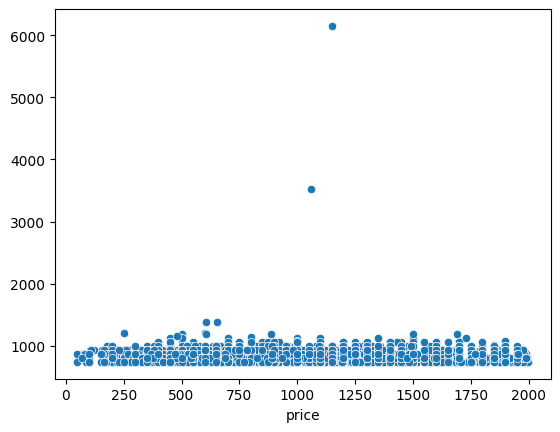

In [110]:
sns.scatterplot(x = y_test,y = pred);

<Axes: ylabel='Count'>

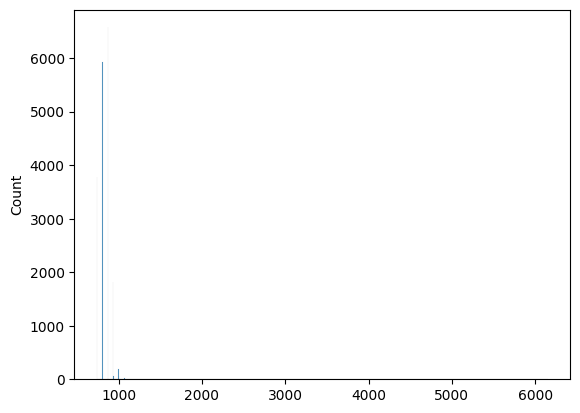

In [111]:
sns.histplot(pred)

In [112]:
rnd_reg = RandomForestRegressor(n_estimators=100, max_depth=6)

In [113]:
rnd_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=6)

In [114]:
pred = rnd_reg.predict(X_test)

In [115]:
print("MSE:", mean_squared_error(y_test,pred))
print("MAE:", mean_absolute_error(y_test,pred))
print("MAPE:", mean_absolute_percentage_error(y_test,pred))

MSE: 115703.16972662833
MAE: 265.0247853912056
MAPE: 0.3828897619238933


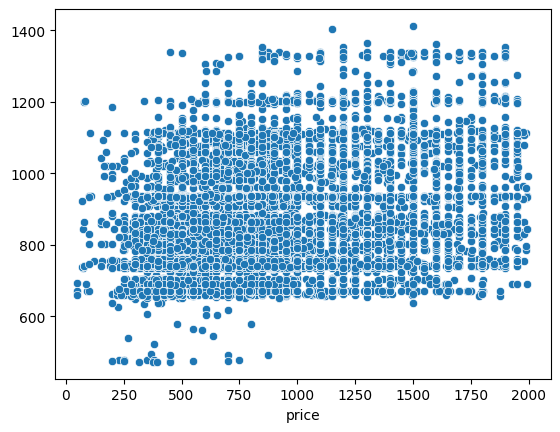

In [116]:
sns.scatterplot(x = y_test,y = pred);

In [117]:
import pickle

# Guardar el modelo entrenado en un archivo
with open('..\\api\\models\\model.pkl', 'wb') as file:
    pickle.dump(rnd_reg, file)

In [85]:
rnd_reg = RandomForestRegressor(n_estimators=100, max_depth=6)

In [86]:
paramgrid = {
    "n_estimators":[100,200,300],
    "max_depth": [5,7,9],
    "min_samples_leaf": [1,5,10]
}

In [ ]:
rnd_grid = GridSearchCV(rnd_reg, paramgrid, cv = 10, scoring="neg_mean_squared_error", njobs = -1, verbose = 2)

In [ ]:
# rnd_grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
rnd_grid.best_score_

In [ ]:
best_rnd = rnd_grid.best_estimator_

In [ ]:
pred2 = best_rnd.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test,pred2))
print("MAE:", mean_absolute_error(y_test,pred2))
print("MAPE:", mean_absolute_percentage_error(y_test,pred2))